In [1]:
%pylab inline
plt.rcParams["figure.figsize"] = (10, 7)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats
import uncertainties as uc
import uncertainties.unumpy as unp

def nom(arr):
    return array([x.n for x in arr])

def unc(arr):
    return array([x.s for x in arr])

def figure(name, *args, **kwargs):
    plt.close(name)
    plt.figure(name, *args, **kwargs)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def linear(mittelpkt):
    def func(x, a):
        return a*(x - mittelpkt)
    return func

In [3]:
F997 = pd.read_csv("ex_Franzl_997.csv")
F1222 = pd.read_csv("ex_Franzl_1222.csv")
F8 = pd.read_csv("ex_Franzl_8255.csv")
Spalt = pd.read_csv("ex_Spalt.csv")

In [4]:
ora9 = array(F997["orange"].dropna())
gru9 = array(F997["grün"].dropna())
bla9 = array(F997["blau"].dropna())
ora1 = array(F1222["orange"].dropna())
gru1 = array(F1222["grün"].dropna())
bla1 = array(F1222["blau"].dropna())
ora8 = array(F8["orange"].dropna())
gru8 = array(F8["grün"].dropna())
bla8 = array(F8["blau"].dropna())
S12 = array(Spalt["120"].dropna())
S15 = array(Spalt["150"].dropna())
S19 = array(Spalt["197"].dropna())

### Fehler Kleinwinkelnäherung:

In [5]:
3 * (arctan(S12[-1] / 2 / (120.76 - 11))) ** 2
3 * (arctan(S15[-1] / 2 / (150.76 - 11))) ** 2
3 * (arctan(S19[-1] / 2 / (197.76 - 11))) ** 2

0.004977777013095536

0.005617741857768545

0.005586343203684624

In [6]:
S12 = S12 - (S12[8] + S12[9]) / 2
S15 = S15 - (S15[10] + S15[9]) / 2
S19 = S19 - (S19[10] + S19[9]) / 2

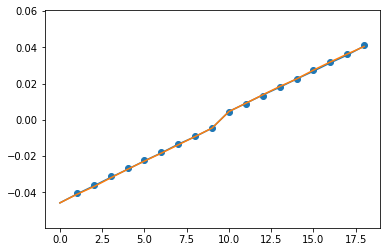

In [9]:
plt.scatter(arange(1, len(s12) + 1), s12)
plt.plot(s15)
plt.plot(s19)

In [10]:
s12 = sin(arctan(S12 / (120.76 - 11)))
s15 = sin(arctan(S15 / (150.76 - 11)))
s19 = sin(arctan(S19 / (197.76 - 11)))

0.0001184+/-0.0000008


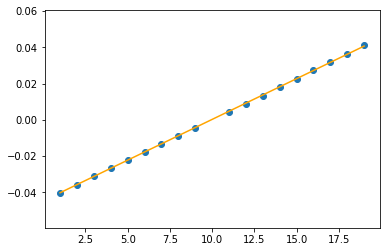

In [11]:
x = array([*range(1, 10), *range(11, len(s12) + 2)])
res12 = scipy.stats.linregress(x, s12)
plt.scatter(x, s12)
plt.plot(x, res12.slope * x + res12.intercept, color="orange")
dist12 = uc.ufloat(res12.slope, res12.stderr)
λ = uc.ufloat(532e-9, 1e-9)
Feh2 = uc.ufloat(1, 1 / sqrt(2) / (120.76 - 11))  # Schirm und Spalt auf je 1 mm
q = uc.ufloat(1, 1 - cos(2 / 180 * pi))  # durch schrägen Schirm, 2 Grad
d12 = Feh2 * q * λ / dist12
print(d12)

0.0001175+/-0.0000007


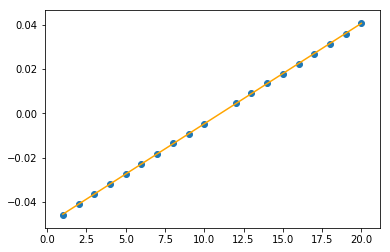

In [12]:
x = array([*range(1, 11), *range(12, len(s15) + 2)])
res = scipy.stats.linregress(x, s15)
plt.plot(x, res.slope * x + res.intercept, color="orange")
plt.scatter(x, s15)
dist15 = uc.ufloat(res.slope, res.stderr)
Feh2 = uc.ufloat(1, 1 / sqrt(2) / (150.76 - 11))  # l
q = uc.ufloat(1, 1 - cos(2 / 180 * pi))  # durch schrägen Schirm, 2 Grad
d15 = Feh2 * q * λ / dist15
print(d15)

0.0001167+/-0.0000005


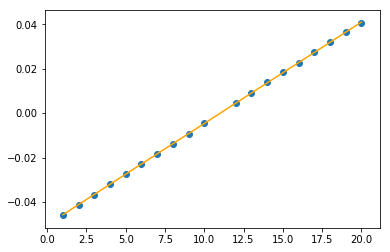

In [13]:
x = array([*range(1, 11), *range(12, len(s19) + 2)])
res19 = scipy.stats.linregress(x, s19)
plt.plot(x, res19.slope * x + res19.intercept, color="orange")
plt.scatter(x, s19)
dist19 = uc.ufloat(res19.slope, res19.stderr)
Feh2 = uc.ufloat(1, 1 / sqrt(2) / (197.76 - 11))  # l
q = uc.ufloat(1, 1 - cos(2 / 180 * pi))  # durch schrägen Schirm, 2 Grad
d19 = Feh2 * q * λ / dist19
print(d19)

0.0001174+/-0.0000005
LinregressResult(slope=0.004530818105063099, intercept=-1.617193515486711e-05, rvalue=0.9999385673557132, pvalue=2.805348069651268e-107, stderr=6.834619801250667e-06)


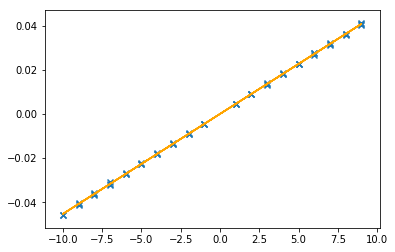

In [14]:
x = array([*range(2, 11), *range(12, len(s12) + 3),*range(1, 11), *range(12, len(s15) + 2), *range(1, 11), *range(12, len(s19) + 2)])
x = x-11
res = scipy.stats.linregress(x, [*s12, *s15, *s19])
plt.plot(x, res.slope * x + res.intercept, color="orange")
plt.scatter(x, [*s12, *s15, *s19], marker='x')
dist19 = uc.ufloat(res.slope, res.stderr)
Feh2 = uc.ufloat(1, 1 / sqrt(6) / (150 - 11))  # l
q = uc.ufloat(1, 1 - cos(2 / 180 * pi))  # durch schrägen Schirm, 2 Grad
d19 = Feh2 * q**2 * λ / dist19
print(d19)
print(res)
savetxt('Spalt2.csv', transpose([x,[*s12, *s15, *s19]]), delimiter=',', comments='', header='x, y')

## Ergebnis für Spaltdicke

In [15]:
d = (d12 + d15 + d19) / 3
print(d)

0.0001177+/-0.0000004


### Fehler Kleinwinkelnäherung Gitter

In [16]:
offset = uc.ufloat(39.7 - 0.76, 0.05)  # 0.76: die Dicke des Schirms
entf1 = uc.ufloat(99.7, 0.05)
entf2 = uc.ufloat(122.2, 0.05)
entf3 = uc.ufloat(82.55, 0.05)
3 * (unp.arctan(ora9[-1] / (99.7 - offset))) ** 2

0.25256266740905003+/-0.00039273263133603474

## Wellenlänge orange

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

-0.0004989243810487043
λ = 580+/-4 nm
0.0579713672095723


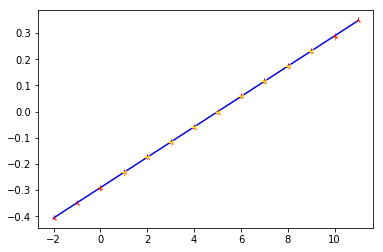

In [17]:
o9 = unp.sin(unp.arctan(ora9 / (entf1 - offset)))
o1 = unp.sin(unp.arctan(ora1 / (entf2 - offset)))
o8 = unp.sin(unp.arctan(ora8 / (entf3 - offset)))

plt.errorbar(arange(len(ora9)), nom(o9), unc(o9), color="orange", fmt="1")
plt.errorbar(arange(len(ora8)) - 2, nom(o8), unc(o8), color="red", fmt="2")
plt.errorbar(arange(len(ora1)) + 1, nom(o1), unc(o1), color="yellow", fmt="3")

reso = scipy.stats.linregress(
    [*arange(len(o9)), *arange(len(o8)) - 2, *arange(len(o1)) + 1], [*nom(o9), *nom(o8), *nom(o1)]
)


plt.plot(
    arange(len(ora8)) - 2,
    reso.slope * (arange(len(ora8)) - 2) + reso.intercept,
    color="blue",
)
print(
    reso.intercept + reso.slope * 5
)  # geht nicht durch 0, um syst. Fehler herauszufiltern...

l = uc.ufloat(reso.slope, reso.stderr)
q = uc.ufloat(1, 1 - cos(2 / 180 * pi))  # durch schrägen Schirm, 2 Grad
a = uc.ufloat(1e-5, 2e-8)
Feh2 = uc.ufloat(1, 1 / sqrt(2) / (100 - 39.84) / sqrt(3))  # l
lora = q**2 * a * l * Feh2
print('λ =', lora*1e9, 'nm')
savetxt('ora.csv', transpose([[*arange(len(o9))-5, *(arange(len(o8)) - 7), *(arange(len(o1)) - 4)],[*nom(o9), *nom(o8), *nom(o1)]]), delimiter=',', comments='', header='x, y')
print(reso.slope)

## Wellenlänge grün

In [18]:
unp.sin(unp.arctan(gru9 / (99.7 - offset)))

array([-0.2754466198502366+/-0.00020947025454284273,
       -0.21973618153452043+/-0.00017209220050851655,
       -0.16528296474716822+/-0.00013229730821643162,
       -0.10967616355185619+/-8.916794292443192e-05,
       -0.0549379585651724+/-4.5072536172090374e-05, -0.0+/-0,
       0.05466186398559568+/-4.484738211253574e-05,
       0.10993186508542954+/-8.937075119417691e-05,
       0.16393235048582402+/-0.00013127622016006972,
       0.2177730786455587+/-0.00017070866162933681,
       0.2723948456125879+/-0.00020752422116584099], dtype=object)

-0.00025681839361146874
λ = 549+/-4 nm
0.05486733042333522


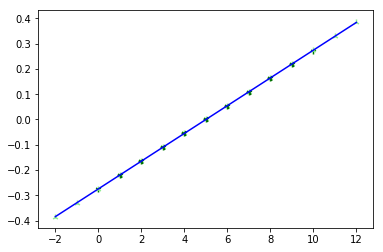

In [19]:
g9 = sin(arctan(gru9 / (99.7 - offset.n)))
g1 = sin(arctan(gru1 / (122.2 - offset.n)))
g8 = sin(arctan(gru8 / (82.55 - offset.n)))

plt.scatter(arange(len(gru9)), g9, color="green", marker="1")
plt.scatter(arange(len(gru8)) - 2, g8, color="lightgreen", marker="2")
plt.scatter(arange(len(gru1)) + 1, g1, color="darkgreen", marker="3")

reso = scipy.stats.linregress(
    [*arange(len(g9)), *arange(len(g8)) - 2, *arange(len(g1)) + 1], [*g9, *g8, *g1]
)

plt.plot(
    arange(len(gru8)) - 2,
    reso.slope * (arange(len(gru8)) - 2) + reso.intercept,
    color="blue",
)

print(
    reso.intercept + reso.slope * 5
)  # geht nicht durch 0, um syst. Fehler herauszufiltern...

l = uc.ufloat(reso.slope, reso.stderr)
a = uc.ufloat(1e-5, 2e-8)
q = uc.ufloat(1, 1 - cos(2 / 180 * pi))  # durch schrägen Schirm, 2 Grad
Feh2 = uc.ufloat(1, 1 / sqrt(2) / (100 - 39.84) / sqrt(3))  # l
lgru = q**2 * a * l * Feh2
print('λ =', lgru*1e9, 'nm')
savetxt('gru.csv', transpose([[*arange(len(g9))-5, *arange(len(g8)) - 7, *arange(len(g1)) - 4], [*g9, *g8, *g1]]), delimiter=',', comments='', header='x, y')
print(reso.slope)

## Wellenlänge blau

7.409656668821984e-05
λ = 436.1+/-3.2 nm
0.0436092268786871


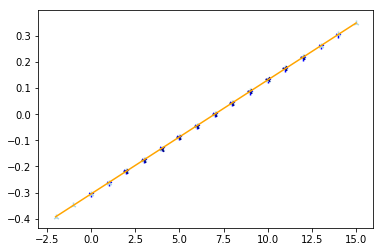

In [20]:
b9 = sin(arctan(bla9 / (99.7 - offset.n)))
b1 = sin(arctan(bla1 / (122.2 - offset.n)))
b8 = sin(arctan(bla8 / (82.55 - offset.n)))

plt.scatter(arange(len(bla9)), b9, color="blue", marker="1")
plt.scatter(arange(len(bla8)) - 2, b8, color="lightblue", marker="2")
plt.scatter(arange(len(bla1)) + 2, b1, color="darkblue", marker="3")

reso = scipy.stats.linregress(
    [*arange(len(b9)), *arange(len(b8)) - 2, *arange(len(b1)) + 2], [*b9, *b8, *b1]
)
plt.plot(
    arange(len(b8)) - 2,
    reso.slope * (arange(len(b8)) - 2) + reso.intercept,
    color="orange",
)
print(
    reso.intercept + reso.slope * 7
)  # geht nicht durch 0, um syst. Fehler herauszufiltern...

l = uc.ufloat(reso.slope, reso.stderr)
a = uc.ufloat(1e-5, 2e-8)
q = uc.ufloat(1, 1 - cos(2 / 180 * pi))  # durch schrägen Schirm, 2 Grad
Feh2 = uc.ufloat(1, 1 / sqrt(2) / (100 - 39.84) / sqrt(3))  # l
lbla = q**2 * a * l * Feh2
print('λ =', lbla*1e9, 'nm')
savetxt('bla.csv', transpose([[*arange(len(b9))-7, *arange(len(b8)) - 9, *arange(len(b1)) - 5], [*b9, *b8, *b1]]), delimiter=',', comments='', header='x, y')
print(reso.slope)

# Prisma

In [21]:
w1 = uc.ufloat(5.2, 0.05)
w2 = uc.ufloat(125.1, 0.05)
eps = (w2 - w1) / 2
print(eps)

59.950+/-0.035


In [22]:
def sellmeier1(x, b1, c1):
    return sqrt(1 + b1 * x ** 2 / (x ** 2 - c1))


def oszi(x, b1, c1, d1):
    return sqrt(1 + b1 * x ** 2 / (x ** 2 - c1 - 1j * d1 * x)).real


def sellmeier1c(x, b1, c1, n0):
    return sqrt(1 + b1 * x ** 2 / (x ** 2 - c1)) + n0


def sellmeier2(x, b1, c1, b2, c2):
    return sqrt(1 + b1 * x ** 2 / (x ** 2 - c1) + b2 * x ** 2 / (x ** 2 - c2))


def quad(x, a, b, c):
    return a * x ** 2 + b * x + c

In [23]:
oszi(1, 2, 30, 0.1)
sellmeier1(1, 2, 30)

0.9649017141534556

0.9649012813540153

[0.0005056816272030222, 0.0005086325269839784, 0.0005267519411149452, 0.0005155043677979838, 0.0005437656475500435]


<ErrorbarContainer object of 3 artists>

[1.54515922e+00 1.74579359e+04]


[613.4286485062447+/-7.789928143166568
 438.33380700612935+/-2.2322319453404145
 558.0073720439358+/-5.447574794824951]


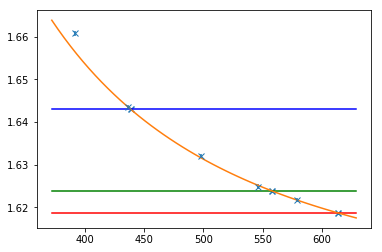

In [31]:
data = loadtxt("Prisma.csv", delimiter=",")
delta = data[:, 1] - data[:, 0]
n = unp.sin((delta + eps) * pi / 360) / unp.sin(eps * pi / 360)
m = sin((delta + eps.n) * pi / 360) / sin(eps.n * pi / 360)

y = []
for z in arange(0, 5):
    y.append(n[z].s)
print(y)
plt.errorbar(data[0:5, 2], m[0:5], yerr=y, fmt="x")

x = linspace(min(data[:5, 2]) - 20, max(data[:5, 2]) + 50)
# x = arange(200, 700)
plt.plot(x, n[5].n * ones_like(x), color="red")
plt.plot(x, n[6].n * ones_like(x), color="blue")
plt.plot(x, n[7].n * ones_like(x), color="green")

# re=scipy.stats.linregress(data[0:4,2],m[0:4])
# plt.plot(arange(395, 680), re.slope*(arange(395, 680)) + re.intercept, color='orange')

p_s1, pcov_s1 = scipy.optimize.curve_fit(sellmeier1, data[:4, 2], m[:4], sigma=[x.s for x in n[:4]])
plt.plot(x, sellmeier1(x, *p_s1))
print(p_s1)

# p_s2, pcov_s2 = scipy.optimize.curve_fit(
#     sellmeier2, data[:5, 2], m[:5], [1.04, 6000, 1.01, 103e6]
# )
# plt.plot(x, sellmeier2(x, *p_s2))
# print(p_s2)

# data[0:5, 2], m[0:5]
z=unp.sqrt(p_s1[1]*((m[5:8])**2-1)/((m[5:8])**2-1-p_s1[0]))
plt.scatter(z,m[5:8],marker='x')
savetxt('Pri1.csv', transpose([[*data[0:4, 2]], [*m[0:4]]]), delimiter=',', comments='', header='x, y')
savetxt('Pri2.csv', transpose([[*z], [*m[5:8]]]), delimiter=',', comments='', header='x, y')
Feh=cholesky(pcov_s1)
k=ones(2)*uc.ufloat(0,1)
b1=p_s1[0] + dot(Feh, k)[0]
c1=p_s1[1] + dot(Feh, k)[1]
z=unp.sqrt(c1*((n[5:8])**2-1)/((n[5:8])**2-1-b1))
print(z)

In [25]:
print(b1)

1.5452+/-0.0021


für die blaue Lampe habe ich die aufgeschriebenen 127.65 zu 126.65 gemacht - das war offenbar ein Abschreibfehler...

In [26]:
print(m[5:8])
print(pcov_s1[0,0])

[1.61874442 1.64304211 1.62386535]
4.510831334786311e-06


In [27]:
print(m)

[1.62182068 1.62488583 1.64354068 1.63199449 1.66079299 1.61874442
 1.64304211 1.62386535]


In [71]:
unp.uarray.n = lambda self: array([x.n for x in self])

In [83]:
unp.uarray=ones(2)*uc.ufloat(0,1)
print(Feh@unp.uarray)

TypeError: ufunc 'matmul' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [93]:
print(n)

[1.6218206779629827+/-0.0005056816272030222
 1.624885825088139+/-0.0005086325269839784
 1.6435406801150867+/-0.0005267519411149452
 1.6319944891579337+/-0.0005155043677979838
 1.660792989674569+/-0.0005437656475500435
 1.6187444150604942+/-0.0005027272615368142
 1.6430421054084257+/-0.0005262640111520585
 1.6238653457644943+/-0.0005076492800709767]
